Unsupervised machine learning is what more resembles the concept of Artificial Intelligence: the idea that a computer can learn to identify complex processes and patterns without a human to provide guidance along the way. So while a supervised algorithm will learn how to best fit its model to the ascribed labels, an unsupervised one will try to understand the underlying structure of data, by bringing together similar behaviours in sub-spaces of features and the labels are self assigned.

The use case for this chapter will be a dataset published on Proteogenomics connects somatic mutations to signalling in breast cancer, by Mertins and colleagues. In between other analyses of primary breast tumors' expression data they show how the PAM50 panel of genes is not exactly the best set of cancer marker to stratify tumor-types, but nonetheless behaves well.

### Didactic example taken from (and slightly adapted) http://www.nature.com/nature/journal/v534/n7605/full/nature18003.html

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
### Set path to the data set
dataset_path = "77_cancer_proteomes_CPTAC_itraq.csv"
clinical_info = "clinical_data_breast_cancer.csv"
pam50_proteins = "PAM50_proteins.csv"

In [3]:
## Load data
data = pd.read_csv(dataset_path,header=0,index_col=0)
clinical = pd.read_csv(clinical_info,header=0,index_col=0)## holds clinical information about each patient/sample
pam50 = pd.read_csv(pam50_proteins,header=0)

In [5]:
data.head()


,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
RefSeq_accession_number,,,,,,,,,,,,,,,,,,,,,
NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [6]:
clinical.head()

,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [7]:
#see that the names from data are different than those from clinical
pam50.head()


,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4
3,FGFR4,NP_075252,Homo sapiens,fibroblast growth factor receptor 4
4,GPR160,NP_055188,Homo sapiens,G protein-coupled receptor 160


In [8]:
print('genes', len(pam50.GeneSymbol.unique()))
print('proteins', len(pam50.RefSeqProteinID.unique()))


genes 50
proteins 100


In [9]:
## Drop unused information columns
data.drop(['gene_symbol','gene_name'],axis=1,inplace=True)

In [10]:
data.head()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
RefSeq_accession_number,,,,,,,,,,,,,,,,,,,,,
NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_000436,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_958781,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [11]:
## Change the protein data sample names to a format matching the clinical data set
import re
#AO-A12D.01TCGA
#TCGA-A2-A0T2
data.rename(columns=lambda x: "TCGA-%s" % (re.split('[_|-|.]',x)[0]) if bool(re.search("TCGA",x)) else x, inplace=True)

In [12]:
#Check if names are ok
data.head()

,TCGA-AO-A12D,TCGA-C8-A131,TCGA-AO-A12B,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,TCGA-C8-A12L,TCGA-A2-A0EX,TCGA-AO-A12D,...,TCGA-AO-A12B,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
RefSeq_accession_number,,,,,,,,,,,,,,,,,,,,,
NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_000436,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_958781,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [13]:
## Transpose data for the clustering algorithm since we want to divide patient samples, not proteins
data = data.T

In [14]:
#do samples match?
print(len(data.index))
print(len(clinical.index))

83
105


In [15]:
## Add clinical meta data to our protein data set, note: all numerical features for analysis start with NP_ or XP_
merged = data.merge(clinical,left_index=True,right_index=True)
"""
left_index : boolean, default False
Use the index from the left DataFrame as the join key(s). If it is a MultiIndex, the number of keys in the other DataFrame (either the index or a number of columns) must match the number of levels
right_index : boolean, default False
Use the index from the right DataFrame as the join key. Same caveats as left_index
"""

'\nleft_index : boolean, default False\nUse the index from the left DataFrame as the join key(s). If it is a MultiIndex, the number of keys in the other DataFrame (either the index or a number of columns) must match the number of levels\nright_index : boolean, default False\nUse the index from the right DataFrame as the join key. Same caveats as left_index\n'

In [16]:
len(merged.index)

80

In [17]:
## Change name to make it look nicer in the code!
processed = merged

#some columns contains other information, like pre-made clusters, we will use them as reference
processed.columns

Index(['NP_958782', 'NP_958785', 'NP_958786', 'NP_000436', 'NP_958781',
       'NP_958780', 'NP_958783', 'NP_958784', 'NP_112598', 'NP_001611',
       ...
       'PAM50 mRNA', 'SigClust Unsupervised mRNA', 'SigClust Intrinsic mRNA',
       'miRNA Clusters', 'methylation Clusters', 'RPPA Clusters',
       'CN Clusters', 'Integrated Clusters (with PAM50)',
       'Integrated Clusters (no exp)', 'Integrated Clusters (unsup exp)'],
      dtype='object', length=12582)

In [18]:
## Numerical data for the algorithm, NP_xx/XP_xx are protein identifiers from RefSeq database
##in this case it corresponds to all the columns
numerical_cols = [x for x in processed.columns if bool(re.search("NP_|XP_", x)) == True ]
#label indexing
processed_numerical = processed.loc[:, numerical_cols]

In [20]:
processed_numerical.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
TCGA-A2-A0CM,0.683404,0.694424,0.698098,0.687077,0.687077,0.698098,0.698098,0.698098,-2.652150,-0.984373,...,NaN,NaN,1.153614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A2-A0D2,0.107491,0.104164,0.107491,0.097512,0.104164,0.104164,0.104164,0.104164,-0.880454,-1.512473,...,0.919136,-1.648856,0.832649,NaN,-8.324969,-4.679219,NaN,-1.106650,NaN,-6.941181
TCGA-A2-A0EQ,-0.912670,-0.927979,-0.927979,-0.931806,-0.927979,-0.927979,-0.927979,-0.927979,-3.071151,-2.278943,...,-0.801685,NaN,NaN,3.802310,-6.373934,-1.123160,NaN,NaN,NaN,NaN
TCGA-A2-A0EV,0.452986,0.472590,0.472590,0.458587,0.472590,0.472590,0.472590,0.472590,-0.742871,1.811277,...,-4.966177,-1.471027,NaN,-0.474013,-12.278546,-10.337729,-0.653251,NaN,NaN,NaN
TCGA-A2-A0EX,1.185108,1.192612,1.188860,1.185108,1.200116,1.188860,1.188860,1.192612,1.046289,2.138081,...,1.451490,-2.018981,0.877456,NaN,NaN,-6.101005,NaN,-1.726336,NaN,NaN


In [26]:
bool_pam_50 = processed_numerical.columns.isin(pam50['RefSeqProteinID'])
#boolean indexing
processed_numerical_p50 = processed_numerical.iloc[:, bool_pam_50]

In [28]:
processed_numerical_p50.head()

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_057547,NP_054895,NP_001246,NP_055606,NP_036451,NP_000624,NP_569082,NP_001159,NP_001229,NP_002458
TCGA-A2-A0CM,2.160157,2.623021,4.768355,0.639321,4.933663,-4.419112,-0.271711,-6.013418,-6.013418,-6.318320,...,-1.292949,3.541400,3.177722,NaN,-1.792547,NaN,NaN,2.516489,2.556897,NaN
TCGA-A2-A0D2,2.249702,3.576941,2.169868,2.968207,0.543251,-5.421010,-1.206443,-5.297932,-5.277974,-5.311238,...,-3.694601,2.495856,2.722053,0.373604,-1.342826,-4.183584,-2.889608,3.487128,NaN,-0.714133
TCGA-A2-A0EQ,-0.020957,1.884936,-7.407249,-7.675146,-5.187535,-2.795601,7.158672,-9.114133,-8.762041,-9.573385,...,-1.410193,0.702364,-1.402538,NaN,NaN,1.934688,NaN,0.798041,2.003576,NaN
TCGA-A2-A0EV,-1.364604,-2.246793,-3.750716,-3.882344,-2.252395,-3.252209,-1.574649,-2.190781,-2.871327,-2.190781,...,0.018893,-1.574649,-4.515280,NaN,NaN,2.049328,NaN,-0.266769,-3.201798,-7.724769
TCGA-A2-A0EX,-2.506723,-2.953194,-0.803378,-2.315378,-0.098028,-1.643795,-1.212331,4.186597,3.976493,3.942726,...,-0.822137,-2.938187,-3.395914,-1.827636,0.082061,0.044543,-2.079011,-3.046991,2.554537,-0.443199


In [29]:
#are there missing values?
processed_numerical_p50.isnull().sum()

NP_057427        0
NP_002408        0
NP_000415        0
NP_000413        0
NP_000517        0
NP_004439        0
NP_005219        0
NP_058519        0
NP_058518        0
NP_001116539     0
NP_061155        0
NP_001035932     0
NP_077006        0
NP_000917        0
NP_065178        0
NP_006836        0
NP_006614        0
NP_001784        3
NP_006092        2
NP_001153651     0
NP_001159403     0
NP_000116        0
NP_004314        0
NP_060601        2
NP_005931        0
NP_003003        0
NP_113611        5
NP_002002       11
NP_004487        0
NP_008950        0
NP_114172        6
NP_001062        5
NP_001444       41
NP_057547        6
NP_054895        0
NP_001246        9
NP_055606       35
NP_036451       18
NP_000624       20
NP_569082       56
NP_001159       15
NP_001229       47
NP_002458       58
dtype: int64

In [33]:
processed_numerical_p50.head(20)

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_057547,NP_054895,NP_001246,NP_055606,NP_036451,NP_000624,NP_569082,NP_001159,NP_001229,NP_002458
TCGA-A2-A0CM,2.160157,2.623021,4.768355,0.639321,4.933663,-4.419112,-0.271711,-6.013418,-6.013418,-6.318320,...,-1.292949,3.541400,3.177722,NaN,-1.792547,NaN,NaN,2.516489,2.556897,NaN
TCGA-A2-A0D2,2.249702,3.576941,2.169868,2.968207,0.543251,-5.421010,-1.206443,-5.297932,-5.277974,-5.311238,...,-3.694601,2.495856,2.722053,0.373604,-1.342826,-4.183584,-2.889608,3.487128,NaN,-0.714133
TCGA-A2-A0EQ,-0.020957,1.884936,-7.407249,-7.675146,-5.187535,-2.795601,7.158672,-9.114133,-8.762041,-9.573385,...,-1.410193,0.702364,-1.402538,NaN,NaN,1.934688,NaN,0.798041,2.003576,NaN
TCGA-A2-A0EV,-1.364604,-2.246793,-3.750716,-3.882344,-2.252395,-3.252209,-1.574649,-2.190781,-2.871327,-2.190781,...,0.018893,-1.574649,-4.515280,NaN,NaN,2.049328,NaN,-0.266769,-3.201798,-7.724769
TCGA-A2-A0EX,-2.506723,-2.953194,-0.803378,-2.315378,-0.098028,-1.643795,-1.212331,4.186597,3.976493,3.942726,...,-0.822137,-2.938187,-3.395914,-1.827636,0.082061,0.044543,-2.079011,-3.046991,2.554537,-0.443199
TCGA-A2-A0EY,-1.015330,-0.840446,-3.059805,-3.638587,-2.547645,5.800973,-3.571964,-6.465874,-6.361777,-6.557480,...,-0.303303,-1.327622,-0.615596,0.204692,NaN,NaN,-0.490679,-1.169394,NaN,NaN
TCGA-A2-A0SW,0.293752,0.039676,-5.945578,-3.610654,-1.899662,-4.308558,-3.372659,-2.099063,-1.976850,-1.565183,...,-0.371991,0.419182,-0.774010,NaN,-0.510286,-0.317317,NaN,0.313049,NaN,NaN
TCGA-A2-A0SX,1.457488,1.385987,5.625404,3.271828,2.166540,-4.891209,-1.774955,-4.414536,-4.414536,-3.776985,...,NaN,-2.063939,0.313471,NaN,NaN,-1.337011,NaN,0.393910,NaN,NaN
TCGA-A2-A0T3,1.059592,-0.451477,-0.355684,0.305602,0.123285,-3.937134,-3.102801,2.165855,1.597273,1.897015,...,1.516930,0.592984,0.738219,-0.510190,-1.480488,-0.847013,NaN,1.921736,NaN,NaN
TCGA-A2-A0T6,-2.885329,-3.435150,-2.781589,-3.189632,-2.297470,-4.804515,-2.553362,-0.720625,-0.772495,-0.616886,...,0.939211,-2.141861,-3.549264,NaN,-1.460636,-0.813991,NaN,NaN,-1.187454,-7.000341


In [32]:
#how many proteins?
len(processed_numerical_p50.columns)

43

In [34]:
#NaN
## Impute missing values (maybe another method would work better? mean, or drop columns?)
from sklearn.preprocessing import Imputer, StandardScaler


imputer = Imputer(missing_values='NaN', strategy='median', axis=1).fit(processed_numerical_p50)
processed_numerical_p50 = imputer.transform(processed_numerical_p50)
scaler = StandardScaler()
processed_numerical_p50= scaler.fit_transform(processed_numerical_p50)
# Beware imputer.transform returns a numpy array, not a dataframe

In [35]:
processed_numerical_p50

array([[ 1.91542944,  1.78700295,  2.36870146, ...,  1.88625841,
         1.53447591,  0.86631839],
       [ 1.98677961,  2.31149824,  1.50656471, ...,  2.5215668 ,
         0.553998  ,  0.16236519],
       [ 0.17748595,  1.38118076, -1.67097091, ...,  0.7614901 ,
         1.21269563,  0.24369876],
       ..., 
       [-1.99120916, -1.47360254, -1.17218617, ...,  0.49834362,
        -2.25654281, -2.93662004],
       [-0.42874582, -0.52860867, -0.45189506, ..., -0.35834188,
         1.93202424, -0.43917482],
       [ 0.37718015,  0.10210343,  0.39381078, ..., -0.11415535,
         1.12805358, -1.41168485]])

In [36]:
#if dimensions > 10 (quite always), try different models (for KMeans different clusters).
## Check which number of clusters works best, 20 and 79 are just for fun and comparison.
n_clusters = [2,3,4,5,6,7,8,10,20,79]

In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics

def compare_k_means(k_list, data):
    ## Run clustering with different k and check the metrics
    for k in k_list:
        clusterer = KMeans(n_clusters=k, random_state=0)
        clusterer.fit(data)
        ##
        print("Silhouette Coefficient for k == {}: {}".format(k, metrics.silhouette_score(data, clusterer.labels_)))
        print("Homogeneity score for k == {}: {}".format(k, metrics.homogeneity_score(processed['PAM50 mRNA'], clusterer.labels_)))
        
        print("------------------------------------")

In [38]:
#Non-perfect labelings that further split classes into more clusters can be perfectly homogeneous
compare_k_means(n_clusters,processed_numerical_p50)

Silhouette Coefficient for k == 2: 0.15696581955301553
Homogeneity score for k == 2: 0.15645672612444617
------------------------------------
Silhouette Coefficient for k == 3: 0.13213170393298265
Homogeneity score for k == 3: 0.4345852830582786
------------------------------------
Silhouette Coefficient for k == 4: 0.13010197337229304
Homogeneity score for k == 4: 0.5099731951878883
------------------------------------
Silhouette Coefficient for k == 5: 0.11989046761712183
Homogeneity score for k == 5: 0.5036832758691269
------------------------------------
Silhouette Coefficient for k == 6: 0.11377601873559848
Homogeneity score for k == 6: 0.5140619986562179
------------------------------------
Silhouette Coefficient for k == 7: 0.10557902490823363
Homogeneity score for k == 7: 0.49012055189297393
------------------------------------
Silhouette Coefficient for k == 8: 0.09885918174149169
Homogeneity score for k == 8: 0.5307514570967622
------------------------------------
Silhouette 

In [39]:
processed['PAM50 mRNA']

TCGA-A2-A0CM       Basal-like
TCGA-A2-A0D2       Basal-like
TCGA-A2-A0EQ    HER2-enriched
TCGA-A2-A0EV        Luminal A
TCGA-A2-A0EX        Luminal A
TCGA-A2-A0EY        Luminal B
TCGA-A2-A0SW        Luminal B
TCGA-A2-A0SX       Basal-like
TCGA-A2-A0T3        Luminal B
TCGA-A2-A0T6        Luminal A
TCGA-A2-A0YC        Luminal A
TCGA-A2-A0YD        Luminal A
TCGA-A2-A0YF        Luminal A
TCGA-A2-A0YG        Luminal B
TCGA-A2-A0YM       Basal-like
TCGA-A7-A0CE       Basal-like
TCGA-A7-A0CJ        Luminal B
TCGA-A7-A13F        Luminal B
TCGA-A8-A06N        Luminal B
TCGA-A8-A06Z        Luminal B
TCGA-A8-A076    HER2-enriched
TCGA-A8-A079        Luminal B
TCGA-A8-A08Z        Luminal A
TCGA-A8-A09G    HER2-enriched
TCGA-AN-A04A        Luminal A
TCGA-AN-A0AJ        Luminal B
TCGA-AN-A0AL       Basal-like
TCGA-AN-A0AM        Luminal B
TCGA-AN-A0FK        Luminal B
TCGA-AN-A0FL       Basal-like
                    ...      
TCGA-AR-A1AP        Luminal A
TCGA-AR-A1AS        Luminal A
TCGA-AR-A1

In [43]:
#What would have happened with random proteins?
## Create a random numerical matrix with imputation:
from numpy import random

rnd_indexing = random.choice(range( processed_numerical.shape[1]) , 43)
processed_numerical_random = processed_numerical.iloc[:, rnd_indexing]
#NaN inside!
imputer_rnd = imputer.fit(processed_numerical_random)
processed_numerical_random = imputer_rnd.transform(processed_numerical_random)

In [44]:
compare_k_means(n_clusters, processed_numerical_random)

Silhouette Coefficient for k == 2: 0.20284461227265993
Homogeneity score for k == 2: 0.023843492046815122
------------------------------------
Silhouette Coefficient for k == 3: 0.08320787239546137
Homogeneity score for k == 3: 0.028103035705633713
------------------------------------
Silhouette Coefficient for k == 4: 0.06607180697255177
Homogeneity score for k == 4: 0.03485395655363362
------------------------------------
Silhouette Coefficient for k == 5: 0.06516179672758034
Homogeneity score for k == 5: 0.07295565081372689
------------------------------------
Silhouette Coefficient for k == 6: 0.06898834236429657
Homogeneity score for k == 6: 0.0736089799875107
------------------------------------
Silhouette Coefficient for k == 7: 0.0612084818017646
Homogeneity score for k == 7: 0.1892883169714477
------------------------------------
Silhouette Coefficient for k == 8: 0.05240751599884661
Homogeneity score for k == 8: 0.15326879188750536
------------------------------------
Silhoue

In [ ]:
#The scores are pretty much lower than p50 (are they significantly lower?)


## Visualization

In [45]:
clusterer_final.labels_

NameError: name 'clusterer_final' is not defined

In [46]:
## Visualize data using k==3, show the heatmap of protein expression for the used PAM50 proteins (43 available in our data)
clusterer_final = KMeans(n_clusters=3, random_state=0).fit(processed_numerical_p50)
processed_p50_plot = pd.DataFrame(processed_numerical_p50) #to use pandas methods
## add a column with the predictions
processed_p50_plot['KMeans_cluster'] = clusterer_final.labels_

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

processed_p50_plot['ref_cluster']= le.fit_transform(processed['PAM50 mRNA'].values)
## sort the samples (axis 0) by cluster
processed_p50_plot.sort_values('KMeans_cluster', axis = 0, inplace=True)



In [47]:
clusterer_final.labels_

array([2, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0,
       0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1], dtype=int32)

In [51]:
from sklearn.metrics import adjusted_rand_score as rn
rn(processed['PAM50 mRNA'].values, clusterer_final.labels_)

0.43968574390310439

In [48]:
processed['PAM50 mRNA'].values

array(['Basal-like', 'Basal-like', 'HER2-enriched', 'Luminal A',
       'Luminal A', 'Luminal B', 'Luminal B', 'Basal-like', 'Luminal B',
       'Luminal A', 'Luminal A', 'Luminal A', 'Luminal A', 'Luminal B',
       'Basal-like', 'Basal-like', 'Luminal B', 'Luminal B', 'Luminal B',
       'Luminal B', 'HER2-enriched', 'Luminal B', 'Luminal A',
       'HER2-enriched', 'Luminal A', 'Luminal B', 'Basal-like',
       'Luminal B', 'Luminal B', 'Basal-like', 'Luminal B', 'Basal-like',
       'Luminal A', 'Luminal B', 'HER2-enriched', 'Luminal A',
       'Basal-like', 'Luminal B', 'Luminal A', 'Luminal B', 'Luminal B',
       'HER2-enriched', 'HER2-enriched', 'Luminal A', 'Basal-like',
       'Luminal A', 'Luminal B', 'Luminal B', 'HER2-enriched',
       'Basal-like', 'Luminal A', 'Luminal A', 'Luminal B', 'Luminal A',
       'Basal-like', 'Luminal A', 'Luminal A', 'Luminal B', 'Luminal B',
       'Luminal A', 'Luminal A', 'Luminal A', 'Luminal A', 'Basal-like',
       'Luminal B', 'HER2-enr

In [52]:
pd.crosstab(processed['PAM50 mRNA'].values, clusterer_final.labels_)

col_0,0,1,2
row_0,,,
Basal-like,1,0,18
HER2-enriched,1,10,2
Luminal A,19,3,1
Luminal B,6,19,0


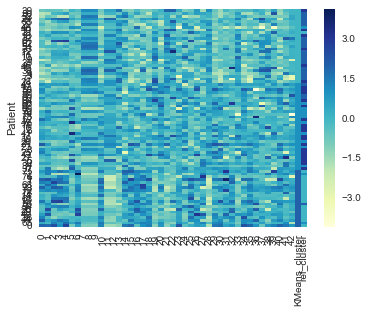

In [53]:
%matplotlib inline
processed_p50_plot.index.name = 'Patient'
sns.heatmap(processed_p50_plot, cmap='YlGnBu')

# ENSEMBLE CLUSTERING

In [54]:
## Let's do ensemble clustering
##First we will try other cluster methods
eps = [0.1, 0.3, 0.5]
min_samples= [10, 15, 20]

import itertools
from sklearn.cluster import DBSCAN
import numpy as np

db_params=itertools.product(eps, min_samples)

def compare_DBSCAN(param_list, data):
    ## Run clustering with different k and check the metrics
    for eps, min_samples in param_list:
        print(eps, min_samples)
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        
        clusterer.fit(data)
        ##
        if len(np.unique(clusterer.labels_)) > 1:
            print("Silhouette Coefficient for eps == {}, min_samples == {}: {}".format(eps, min_samples, metrics.silhouette_score(data, clusterer.labels_)))
        else:
            print("no clustering can be made")
        print("Homogeneity score for eps == {}, min_samples == {}: {}".format(eps, min_samples, metrics.homogeneity_score(processed['PAM50 mRNA'], clusterer.labels_)))
        
        print("------------------------------------")

compare_DBSCAN(db_params, processed_numerical_p50)

0.1 10
no clustering can be made
Homogeneity score for eps == 0.1, min_samples == 10: -3.2688113363820603e-16
------------------------------------
0.1 15
no clustering can be made
Homogeneity score for eps == 0.1, min_samples == 15: -3.2688113363820603e-16
------------------------------------
0.1 20
no clustering can be made
Homogeneity score for eps == 0.1, min_samples == 20: -3.2688113363820603e-16
------------------------------------
0.3 10
no clustering can be made
Homogeneity score for eps == 0.3, min_samples == 10: -3.2688113363820603e-16
------------------------------------
0.3 15
no clustering can be made
Homogeneity score for eps == 0.3, min_samples == 15: -3.2688113363820603e-16
------------------------------------
0.3 20
no clustering can be made
Homogeneity score for eps == 0.3, min_samples == 20: -3.2688113363820603e-16
------------------------------------
0.5 10
no clustering can be made
Homogeneity score for eps == 0.5, min_samples == 10: -3.2688113363820603e-16
--------

In [55]:
from sklearn.cluster import SpectralClustering

def compare_spclust(klist, data):
    ## Run clustering with different k and check the metrics
    for k in klist:
        
        clusterer = SpectralClustering(n_clusters=k)
        
        clusterer.fit(data)
        ##
        if len(np.unique(clusterer.labels_)) > 1:
            print("Silhouette Coefficient for k == {}: {}".format(k, metrics.silhouette_score(data, clusterer.labels_)))
        else:
            print("no clustering can be made")
        print("Homogeneity score for k == {}: {}".format(k , metrics.homogeneity_score(processed['PAM50 mRNA'], clusterer.labels_)))
        
        print("------------------------------------")

compare_spclust(n_clusters, processed_numerical_p50)

Silhouette Coefficient for k == 2: -0.03843916926434747
Homogeneity score for k == 2: 0.030646181075304035
------------------------------------
Silhouette Coefficient for k == 3: -0.10460324550888264
Homogeneity score for k == 3: 0.056156453688779626
------------------------------------
Silhouette Coefficient for k == 4: -0.14496592072019565
Homogeneity score for k == 4: 0.08756564822288647
------------------------------------
Silhouette Coefficient for k == 5: -0.15448840149353343
Homogeneity score for k == 5: 0.11282741547186959
------------------------------------
Silhouette Coefficient for k == 6: -0.15012075483682286
Homogeneity score for k == 6: 0.1338675158097005
------------------------------------
Silhouette Coefficient for k == 7: -0.1618923488268726
Homogeneity score for k == 7: 0.16023207617886592
------------------------------------
Silhouette Coefficient for k == 8: -0.17636135865093389
Homogeneity score for k == 8: 0.1681728659924298
------------------------------------


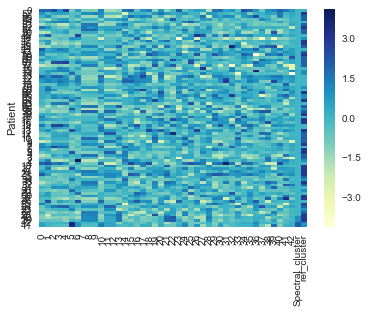

In [56]:
## Visualize data using k==3, show the heatmap of protein expression for the used PAM50 proteins (43 available in our data)
clusterer_final2 = SpectralClustering(n_clusters=3, random_state=0).fit(processed_numerical_p50)
processed_p50_plot = pd.DataFrame(processed_numerical_p50) #to use pandas methods
## add a column with the predictions
processed_p50_plot['Spectral_cluster'] = clusterer_final2.labels_

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

processed_p50_plot['ref_cluster']= le.fit_transform(processed['PAM50 mRNA'].values)
## sort the samples (axis 0) by cluster
processed_p50_plot.sort_values('Spectral_cluster', axis = 0, inplace=True)

processed_p50_plot.index.name = 'Patient'
sns.heatmap(processed_p50_plot, cmap='YlGnBu')

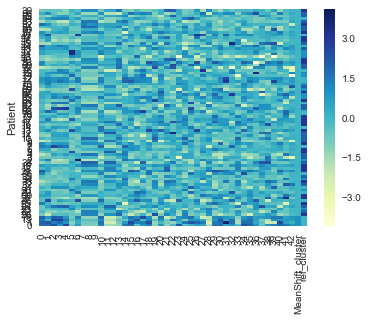

In [57]:
from sklearn.cluster import MeanShift

## Visualize data using k==3, show the heatmap of protein expression for the used PAM50 proteins (43 available in our data)
clusterer_final3 = MeanShift().fit(processed_numerical_p50)
processed_p50_plot = pd.DataFrame(processed_numerical_p50) #to use pandas methods
## add a column with the predictions
processed_p50_plot['MeanShift_cluster'] = clusterer_final3.labels_

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

processed_p50_plot['ref_cluster']= le.fit_transform(processed['PAM50 mRNA'].values)
## sort the samples (axis 0) by cluster
processed_p50_plot.sort_values('MeanShift_cluster', axis = 0, inplace=True)

processed_p50_plot.index.name = 'Patient'
sns.heatmap(processed_p50_plot, cmap='YlGnBu')

In [58]:
### Ensemble clustering with different random_states
def ensemble_kmeans(data, rnd_states, k_list):
    ## Run clustering with different k and check the metrics
    labs=[]
    for r in rnd_states:
        for k in k_list:
            print(k, r)
            clusterer = KMeans(n_clusters=k, random_state=r)
            clusterer.fit(data)
            labs.append(clusterer.labels_)
    return np.array(labs)

In [59]:
rnd_states=[0,1,2,3,4,42,2371]
klist=[3,4,5,6]
cl_data=ensemble_kmeans(processed_numerical_p50, rnd_states, klist)

3 0
4 0
5 0
6 0
3 1
4 1
5 1
6 1
3 2
4 2
5 2
6 2
3 3
4 3
5 3
6 3
3 4
4 4
5 4
6 4
3 42
4 42
5 42
6 42
3 2371
4 2371
5 2371
6 2371


In [60]:
print(cl_data)

[[2 2 2 ..., 0 2 1]
 [0 0 2 ..., 3 0 2]
 [2 2 2 ..., 1 4 3]
 ..., 
 [2 2 0 ..., 1 2 3]
 [2 2 3 ..., 1 3 4]
 [0 0 2 ..., 1 5 2]]


In [61]:
#construct a cooccurrence (consensus) matrix
def cons_matrix(labels):
    C=np.zeros([labels.shape[1],labels.shape[1]], np.int32)
    for label in labels:
        for i, val1 in enumerate(label):
            for j, val2 in enumerate(label):
                #filling C_ij
                
                if val1 == val2 :
                    C[i,j] += 1 
                    
                ##and with a list comprehension?
                
    
    return pd.DataFrame(C)
            

/Users/marco/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


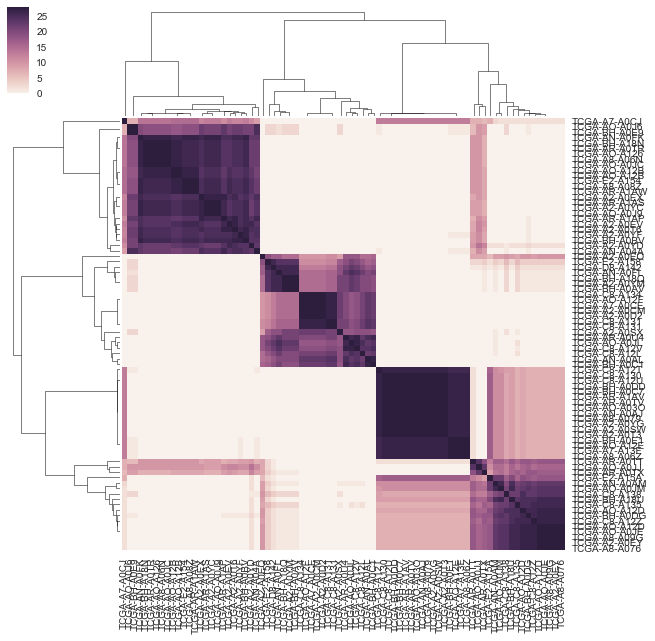

In [62]:
C=cons_matrix(cl_data)
C.columns= processed.index
C.index=processed.index

import matplotlib.pyplot as plt
plt.close()
g=sns.clustermap(C)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

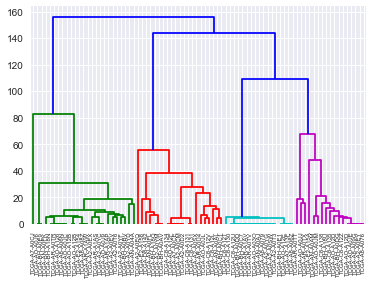

In [63]:
from scipy.cluster.hierarchy import dendrogram
den = dendrogram(g.dendrogram_col.linkage,
                                         labels = C.index,
                                         color_threshold=100)


##### The tree is represented as a collection of ∏ shaped components.
The three items named 'color_list', 'dcoord', 'icoord' indexes these ∏'s
Obviosly 'color_list' contains the colors. The lists in 'dcoord' contain the y coordinates of the ∏'s (the distances) while 'icoord' has the x coordinates. These would be the index coordinates.
We first subtract 5 from each colors icoord, then divide by 10. If the resulting number is close to the closest integer, we consider this to be an index for a leaf. If the resulting number is not close to an integer index, it means the colored tree we got it from is from non-leaf parts of the trees.
For each leaf, we add it to a list per color in a dictionary.

In [64]:
from collections import defaultdict
cluster_idxs = defaultdict(list)
for c, pi in zip(den['color_list'], den['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(den['ivl'][int(i)])
cluster_idxs

defaultdict(list,
            {'c': ['TCGA-A2-A0SW',
              'TCGA-A2-A0T3',
              'TCGA-A2-A0YG',
              'TCGA-A8-A079',
              'TCGA-AN-A0AJ',
              'TCGA-AO-A03O',
              'TCGA-AR-A0TV',
              'TCGA-AR-A1AV',
              'TCGA-BH-A0C7',
              'TCGA-BH-A0DD',
              'TCGA-C8-A12U',
              'TCGA-C8-A130',
              'TCGA-A7-A13F',
              'TCGA-A8-A06Z',
              'TCGA-AO-A12E',
              'TCGA-BH-A0E1',
              'TCGA-C8-A12T'],
             'g': ['TCGA-AO-A0J6',
              'TCGA-BH-A0E9',
              'TCGA-A8-A06N',
              'TCGA-AO-A0JC',
              'TCGA-AO-A126',
              'TCGA-AR-A0TR',
              'TCGA-BH-A18N',
              'TCGA-AN-A0FK',
              'TCGA-AO-A12B',
              'TCGA-AO-A12B',
              'TCGA-A8-A08Z',
              'TCGA-AR-A1AW',
              'TCGA-E2-A154',
              'TCGA-A2-A0YC',
              'TCGA-AO-A0J9',
           

In [65]:
##is this division accurate? 
labels_pred=[]

#Messy part: we need to re-order the elements in order to compare them with the original labels
for k in cluster_idxs:
    for el in cluster_idxs[k]:
        labels_pred.append([el,k])
        
        
print(labels_pred)

[['TCGA-AO-A0J6', 'g'], ['TCGA-BH-A0E9', 'g'], ['TCGA-A8-A06N', 'g'], ['TCGA-AO-A0JC', 'g'], ['TCGA-AO-A126', 'g'], ['TCGA-AR-A0TR', 'g'], ['TCGA-BH-A18N', 'g'], ['TCGA-AN-A0FK', 'g'], ['TCGA-AO-A12B', 'g'], ['TCGA-AO-A12B', 'g'], ['TCGA-A8-A08Z', 'g'], ['TCGA-AR-A1AW', 'g'], ['TCGA-E2-A154', 'g'], ['TCGA-A2-A0YC', 'g'], ['TCGA-AO-A0J9', 'g'], ['TCGA-AR-A1AS', 'g'], ['TCGA-A2-A0EX', 'g'], ['TCGA-A2-A0EV', 'g'], ['TCGA-A2-A0T6', 'g'], ['TCGA-A2-A0YF', 'g'], ['TCGA-BH-A0BV', 'g'], ['TCGA-AR-A1AP', 'g'], ['TCGA-A2-A0YD', 'g'], ['TCGA-AN-A04A', 'g'], ['TCGA-A7-A0CJ', 'g'], ['TCGA-A2-A0YM', 'r'], ['TCGA-BH-A0AV', 'r'], ['TCGA-BH-A18Q', 'r'], ['TCGA-AN-A0FL', 'r'], ['TCGA-D8-A142', 'r'], ['TCGA-E2-A158', 'r'], ['TCGA-A2-A0CM', 'r'], ['TCGA-A2-A0D2', 'r'], ['TCGA-A7-A0CE', 'r'], ['TCGA-AO-A12F', 'r'], ['TCGA-C8-A134', 'r'], ['TCGA-C8-A131', 'r'], ['TCGA-C8-A131', 'r'], ['TCGA-AO-A0JL', 'r'], ['TCGA-C8-A12V', 'r'], ['TCGA-AR-A0U4', 'r'], ['TCGA-AN-A0AL', 'r'], ['TCGA-BH-A0C1', 'r'], ['TCGA-C8-

In [67]:
#create a dataframe and set the index in order to merge the indexes with the reference
labels_pred=pd.DataFrame(labels_pred)
labels_pred.index=labels_pred[0]
labels_pred

,0,1
0,,
TCGA-AO-A0J6,TCGA-AO-A0J6,g
TCGA-BH-A0E9,TCGA-BH-A0E9,g
TCGA-A8-A06N,TCGA-A8-A06N,g
TCGA-AO-A0JC,TCGA-AO-A0JC,g
TCGA-AO-A126,TCGA-AO-A126,g
TCGA-AR-A0TR,TCGA-AR-A0TR,g
TCGA-BH-A18N,TCGA-BH-A18N,g
TCGA-AN-A0FK,TCGA-AN-A0FK,g
TCGA-AO-A12B,TCGA-AO-A12B,g


In [68]:
ref=pd.DataFrame(processed['PAM50 mRNA'])
final=labels_pred.merge(ref,left_index=True,right_index=True)
final.head()

,0,1,PAM50 mRNA
TCGA-A2-A0CM,TCGA-A2-A0CM,r,Basal-like
TCGA-A2-A0D2,TCGA-A2-A0D2,r,Basal-like
TCGA-A2-A0EQ,TCGA-A2-A0EQ,r,HER2-enriched
TCGA-A2-A0EV,TCGA-A2-A0EV,g,Luminal A
TCGA-A2-A0EX,TCGA-A2-A0EX,g,Luminal A


In [69]:
from sklearn.metrics import adjusted_rand_score as rn
from sklearn.metrics import adjusted_mutual_info_score as mi
rand=rn(final['PAM50 mRNA'], final[1])
info=mi(final['PAM50 mRNA'], final[1])
print('rand: {}\nmutual_info: {}'.format(rand,info))

rand: 0.4285226531201588
mutual_info: 0.459886888196437


In [70]:
pd.crosstab(final['PAM50 mRNA'], final[1])

1,c,g,m,r
PAM50 mRNA,,,,
Basal-like,0,1,0,20
HER2-enriched,2,0,11,2
Luminal A,2,18,2,1
Luminal B,13,8,6,0


In the end the ensemble clustering did not make a better clustering, but sure it is a stronger one. 